In [ ]:
# Issues with I24_stitching:
1. the hyper parameters are camera-angle specific. Unify the prediction horizon to 35m instead of N frames
2. does not take into account of lane-changing


In [1]:
# save df to csv
from utils import*
import os.path
from os import path

data_path = pathlib.Path().absolute().joinpath('tracking_outputs')
output_path = data_path.joinpath('stitched')

file_name = 'record_p2c4_00001_track_outputs.csv'
file_dir = data_path.joinpath(file_name)
new_dir = output_path.joinpath('stitched_'+file_name)

df = read_data(file_dir)
# df = read_new_data(new_dir)



Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = calc_dynamics_all(df)
df

C:\Users\wangy79\Documents\I24_trajectory\utils.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bearing'] = degrees(arctan2(X,Y))
C:\Users\wangy79\Documents\I24_trajectory\utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mps'] = distance/timestep


,Frame #,Timestamp,ID,Object class,BBox xmin,BBox ymin,BBox xmax,BBox ymax,Generation method,lat,lon,bearing,mps
0,5,1.754432e+09,0,SUV,3636.909668,3832.751953,770.750732,956.745972,Detector,36.002932,-86.607586,-40.998395,13.521798
1,6,1.754432e+09,0,SUV,3634.338623,3830.378418,763.623108,960.551208,Localizer,36.002932,-86.607586,-40.998395,13.521798
2,7,1.754432e+09,0,SUV,3619.953125,3823.079590,747.198669,963.006836,Localizer,36.002934,-86.607585,-40.998395,13.521798
3,8,1.754432e+09,0,SUV,3598.118896,3819.293701,739.070862,963.632446,Localizer,36.002936,-86.607586,-40.998395,13.521798
4,9,1.754432e+09,0,SUV,3568.413818,3815.786133,730.406799,954.695435,Localizer,36.002939,-86.607585,-40.998395,13.521798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20304,8814,1.754433e+09,3469,SUV,2354.194824,2536.020264,990.632385,1119.290649,Localizer,36.003067,-86.607796,7.883076,29.933658
20306,8815,1.754433e+09,3469,SUV,2311.814697,2459.227783,993.962036,1119.404541,Detector,36.003073,-86.607803,7.883076,29.933658
20309,8816,1.754433e+09,3469,SUV,2212.527344,2345.614746,996.603699,1115.664062,Localizer,36.003085,-86.607816,7.883076,29.933658
20307,8815,1.754433e+09,3471,pickup truck,2106.389160,2417.484863,980.632751,1127.283813,Detector,36.003087,-86.607817,6.622151,3.059078


<Figure size 2880x2880 with 0 Axes>

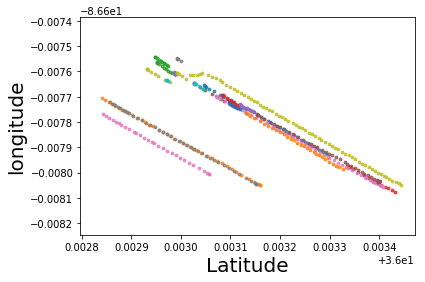

In [5]:

b = get_bearing_bounds(df)

dff = df.loc[(df['bearing']>=b[0]) & (df['bearing']<=b[1]) | (df['bearing']>=b[2]) & (df['bearing']<=b[3])]
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

groups = dff.groupby('ID')
groupList = list(groups.groups)

plt.figure(figsize=(40, 40))
fig, ax = plt.subplots()
start = 0
end = 1000
for i in groupList[:20]:   
    group = groups.get_group(i)
    plt.scatter(x=group.lat, y=group.lon, s=8, alpha=.8, label=group.loc[group.index[0],'ID'])
# print(groups.get_group(groupList[end]).Timestamp.values[-1]-groups.get_group(groupList[start]).Timestamp.values[0])
plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('longitude', fontsize = 20)
plt.xlim(df['lat'].min(),df['lat'].max())
plt.ylim(df['lon'].min()-0.0001,df['lon'].max()+0.0001)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10)
plt.show()

In [4]:
from utils import *
b = get_bearing_bounds(df)
b

[-174.6097244697819,
 -139.30478729917792,
 1.9149613832379941,
 37.21989855384197]